In [1]:
print('Day 3 | 11 July')

Day 3 | 11 July


In [2]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [3]:
df1 = pd.read_csv(r"C:\Users\Dell\Desktop\-\Coding\Internship\Data Files\HR-Employee-Attrition.csv")

In [4]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df1['Attrition'] = df1['Attrition'].apply(lambda x: 1 if x == "Yes" else 0)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df1.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
#Standardization || Sabka mean 0 aur Standar deviation 1 ke aas paas le ana hai
#Normalization || Min Max normalization i sthe most used for normalization || Sabhi values ko 0 aur 1 ke bich le ayega || max vale ko 1 aur min value ko 0 manta hai

In [11]:
from sklearn.preprocessing import StandardScaler

#List of all the numerical columns
numerical_columns = df1.select_dtypes(include=['float', 'int']).columns

#Initializing the StandarScaler
scaler = StandardScaler()

#Fit and transform the numerical columns
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

In [12]:
df1.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,...,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,9.063045e-17,5.075305e-17,4.350262e-17,7.008755e-17,0.0,-1.546760e-16,1.305078e-16,1.691768e-16,6.525392e-17,...,9.667248e-17,0.0,6.767074e-17,-1.208406e-18,8.700523e-17,-6.042030e-18,-3.021015e-17,9.063045e-17,1.208406e-18,-2.779334e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,0.0,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,...,1.000340e+00,0.0,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-4.384223e-01,-1.736576e+00,-1.010909e+00,-1.868426e+00,0.0,-1.701283e+00,-1.575686e+00,-1.766079e+00,-2.432006e+00,...,-1.584178e+00,0.0,-9.320144e-01,-1.450167e+00,-2.171982e+00,-2.493820e+00,-1.144294e+00,-1.167687e+00,-6.791457e-01,-1.155935e+00
25%,-7.581700e-01,-4.384223e-01,-8.366616e-01,-8.875151e-01,-8.916883e-01,0.0,-8.866700e-01,-6.605307e-01,-8.803615e-01,-1.026167e+00,...,-6.589728e-01,0.0,-9.320144e-01,-6.787735e-01,-6.201892e-01,-1.077862e+00,-6.544537e-01,-6.154916e-01,-6.791457e-01,-5.952272e-01
50%,-1.011589e-01,-4.384223e-01,-1.204135e-03,-2.705440e-01,8.504925e-02,0.0,-7.253514e-03,2.546249e-01,5.355811e-03,3.796721e-01,...,2.662326e-01,0.0,2.419883e-01,-1.645114e-01,1.557071e-01,3.380962e-01,-3.278933e-01,-3.393937e-01,-3.687153e-01,-3.148735e-01
75%,6.653541e-01,-4.384223e-01,8.788772e-01,5.932157e-01,1.061787e+00,0.0,8.821327e-01,1.169781e+00,8.787715e-01,3.796721e-01,...,1.191438e+00,0.0,2.419883e-01,4.783162e-01,1.557071e-01,3.380962e-01,3.252275e-01,7.649976e-01,2.521455e-01,8.065415e-01
max,2.526886e+00,2.280906e+00,1.726730e+00,2.444129e+00,2.038524e+00,0.0,1.733302e+00,1.169781e+00,1.678377e+00,1.785511e+00,...,1.191438e+00,0.0,2.589994e+00,3.692454e+00,2.483396e+00,1.754054e+00,5.386914e+00,3.802074e+00,3.977310e+00,3.610079e+00


<Axes: >

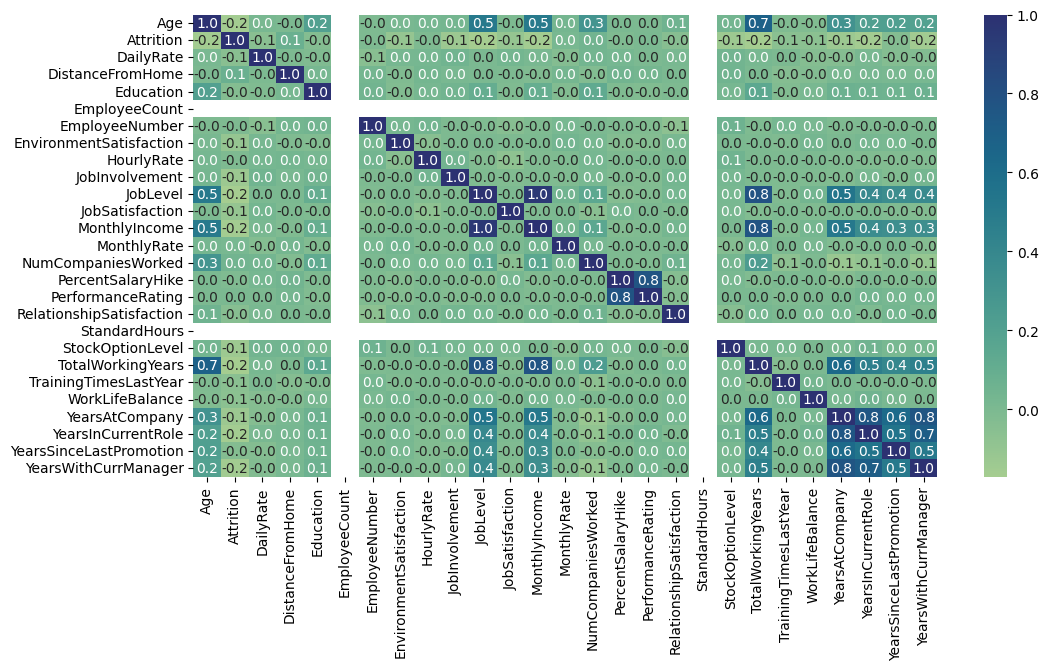

In [13]:
corr = df1.select_dtypes("number").corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True, fmt = '.1f' , cmap = 'crest')

In [14]:
df1 = df1.drop(columns = ['JobLevel','PerformanceRating','YearsWithCurrManager','YearsInCurrentRole','TotalWorkingYears']) #dropping some of the columns woth high correlation

<Axes: >

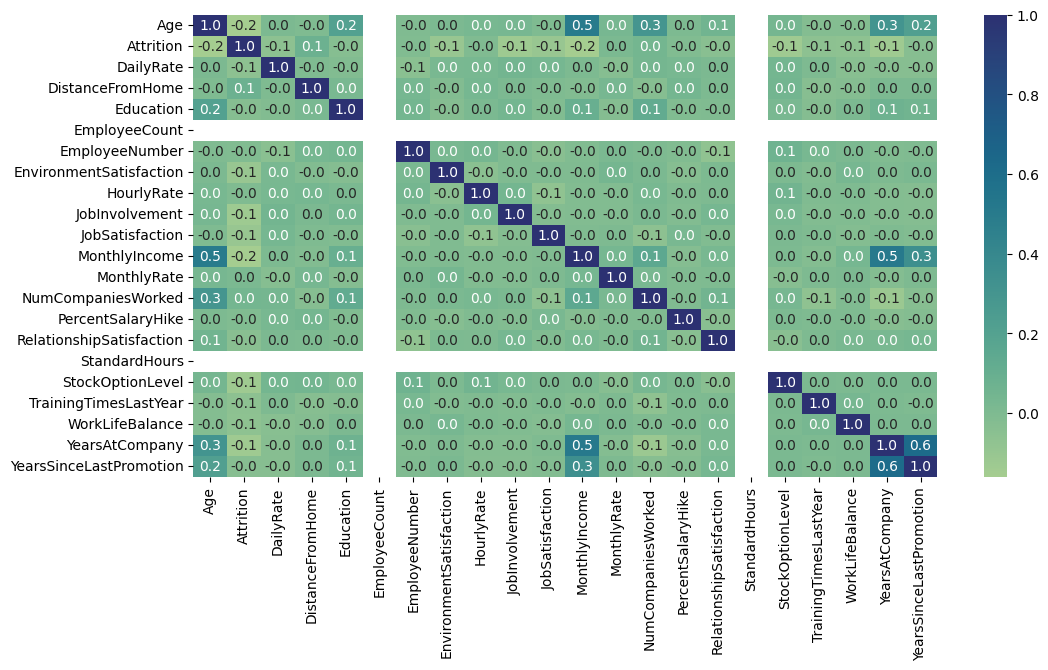

In [15]:
corr = df1.select_dtypes("number").corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True, fmt = '.1f' , cmap = 'crest')

In [16]:
!pip install category_encoders


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from category_encoders import OneHotEncoder

In [18]:
x = df1.drop(['Attrition'],axis = 'columns')
y = df1.Attrition

# We have to split the data into the training data and testing data using an inbuilt function
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

In [19]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

model = make_pipeline(
    OneHotEncoder(),
    LogisticRegression())
model.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['BusinessTravel', 'Department',
                                     'EducationField', 'Gender', 'JobRole',
                                     'MaritalStatus', 'Over18', 'OverTime'])),
                ('logisticregression', LogisticRegression())])

In [20]:
model.score(x_test, y_test)

0.8843537414965986

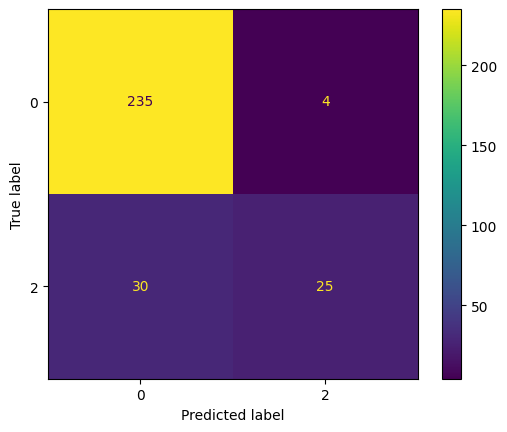

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test);

In [22]:
probabilities = model.predict_proba(x_test)[:,1]
default_predictions = (probabilities > 0.5).astype(int)
default_cm = confusion_matrix(y_test, default_predictions)
print("Confusion Matrix (Default Threshold 0.5) :")
print(default_cm)

adjusted_threshold = 0.6
adjusted_predictions = (probabilities > adjusted_threshold).astype(int)
adjusted_cm = confusion_matrix(y_test, adjusted_predictions)
print("Confusion Matrix (Adjusted Threshold 0.6) :")
print(adjusted_cm)

Confusion Matrix (Default Threshold 0.5) :
[[235   4   0]
 [  0   0   0]
 [ 30  25   0]]
Confusion Matrix (Adjusted Threshold 0.6) :
[[239   0   0]
 [  0   0   0]
 [ 37  18   0]]


In [23]:
features = model.named_steps['onehotencoder'].get_feature_names_out()
importance = model.named_steps['logisticregression'].coef_[0]

In [24]:
features

array(['Age', 'BusinessTravel_1', 'BusinessTravel_2', 'BusinessTravel_3',
       'DailyRate', 'Department_1', 'Department_2', 'Department_3',
       'DistanceFromHome', 'Education', 'EducationField_1',
       'EducationField_2', 'EducationField_3', 'EducationField_4',
       'EducationField_5', 'EducationField_6', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender_1',
       'Gender_2', 'HourlyRate', 'JobInvolvement', 'JobRole_1',
       'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5', 'JobRole_6',
       'JobRole_7', 'JobRole_8', 'JobRole_9', 'JobSatisfaction',
       'MaritalStatus_1', 'MaritalStatus_2', 'MaritalStatus_3',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18_1',
       'OverTime_1', 'OverTime_2', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion'], dtype=object)

In [25]:
odd_ratios = pd.Series(np.exp(importance), index=features).sort_values()
odd_ratios.head()

OverTime_1          0.408612
BusinessTravel_3    0.501087
JobRole_4           0.506525
JobRole_3           0.523461
EducationField_6    0.550649
dtype: float64

<Axes: >

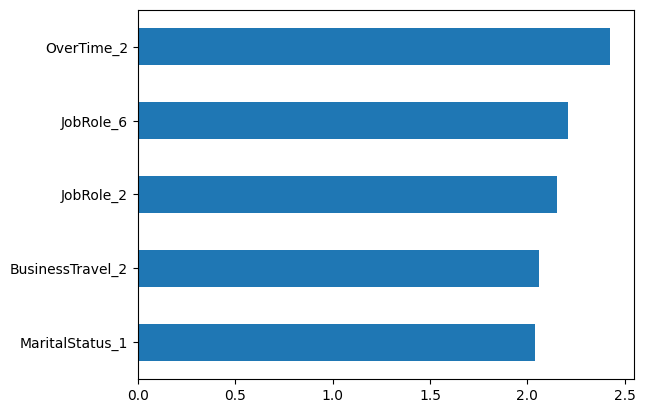

In [26]:
odd_ratios.tail().plot(kind='barh')